In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
end = datetime.datetime.now()
start = datetime.datetime(end.year-20, end.month, end.day)

In [5]:
stock = 'GOOG'
stock_data = yf.download(stock, start, end, auto_adjust= False)

[*********************100%***********************]  1 of 1 completed


In [6]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2005-02-03,5.233012,5.251815,5.314331,5.126036,5.130520,521471303
2005-02-04,5.071699,5.089922,5.174355,5.046086,5.142475,594993855
2005-02-07,4.864969,4.882449,5.140731,4.869498,5.112338,520359150
2005-02-08,4.929743,4.947456,4.981827,4.845089,4.905613,460921194
2005-02-09,4.754532,4.771615,5.021179,4.718813,5.000258,689434520


In [7]:
stock_data.shape

(5031, 6)

In [8]:
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,49.337802,49.502364,50.003247,48.986537,49.479587,1.071011e+08
std,47.303350,47.438218,47.933596,46.939520,47.403579,1.396265e+08
min,4.342810,4.358414,4.443345,4.298140,4.366135,1.584340e+05
25%,13.383317,13.431406,13.568268,13.307496,13.443860,2.638530e+07
50%,28.280462,28.382076,28.684746,28.127775,28.444407,4.964200e+07
75%,65.796341,66.032753,66.760227,65.595001,66.314503,1.307904e+08
max,205.600006,205.600006,207.080002,203.580002,203.714996,1.650833e+09


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-02-03 to 2025-01-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5031 non-null   float64
 1   (Close, GOOG)      5031 non-null   float64
 2   (High, GOOG)       5031 non-null   float64
 3   (Low, GOOG)        5031 non-null   float64
 4   (Open, GOOG)       5031 non-null   float64
 5   (Volume, GOOG)     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [10]:
stock_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


Text(0.5, 1.0, 'Closing price of the stock')

<Figure size 1500x500 with 0 Axes>

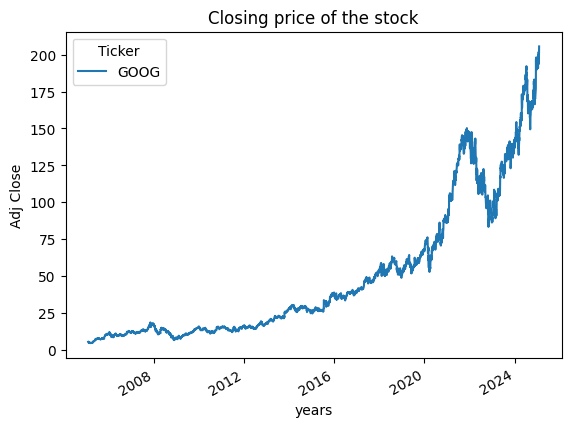

In [11]:
# plot the adjusted adj_close price
plt.figure(figsize=(15,5))
stock_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing price of the stock")

In [12]:
# plot the adj_close price
plt.figure(figsize=(15,5))
# Access the column using case-insensitive index
# Convert the Multi

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [13]:
# define a function to plot specific columns of the graph
def plot_col(figsize, values, column_name):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel('years')
  plt.ylabel(column_name)
  plt.title(f'{column_name} of the stock')

In [14]:
stock_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

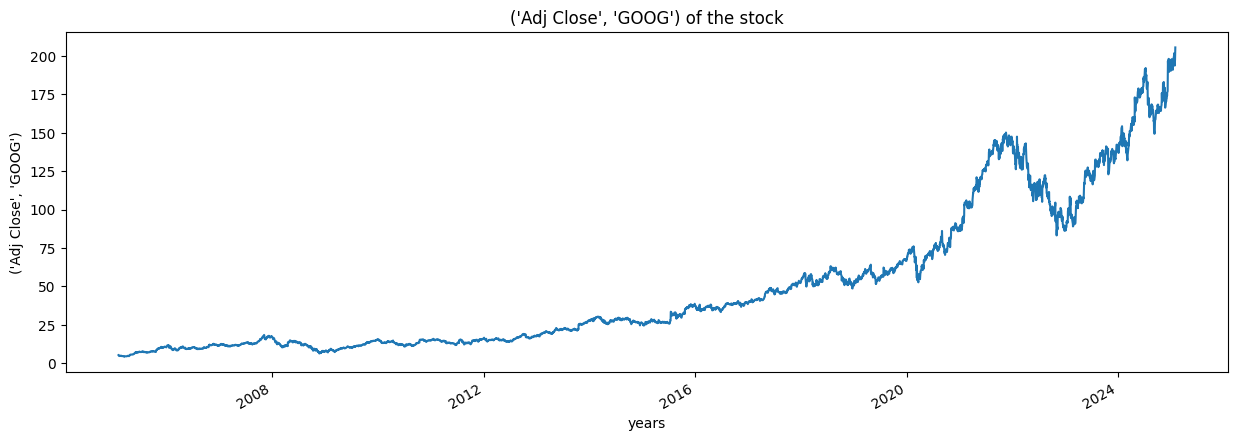

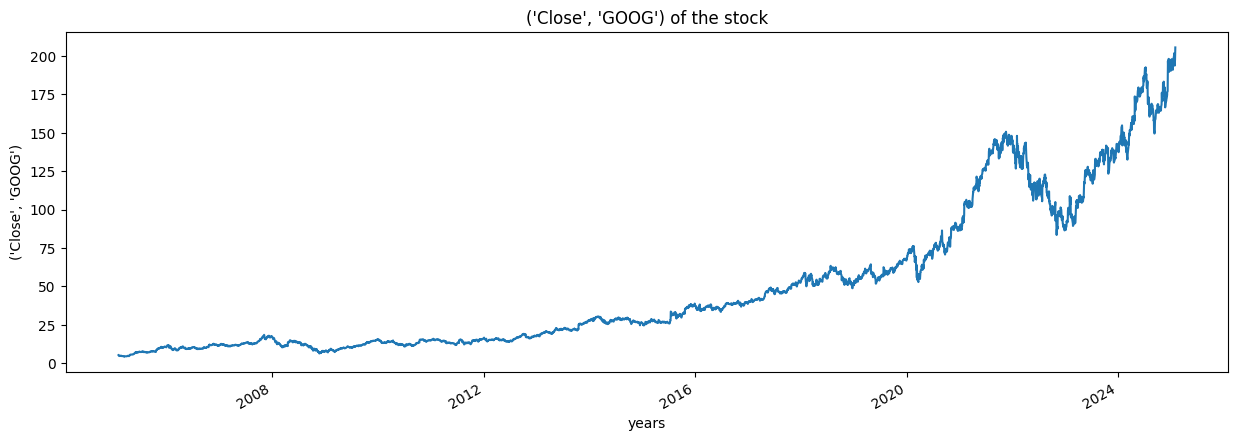

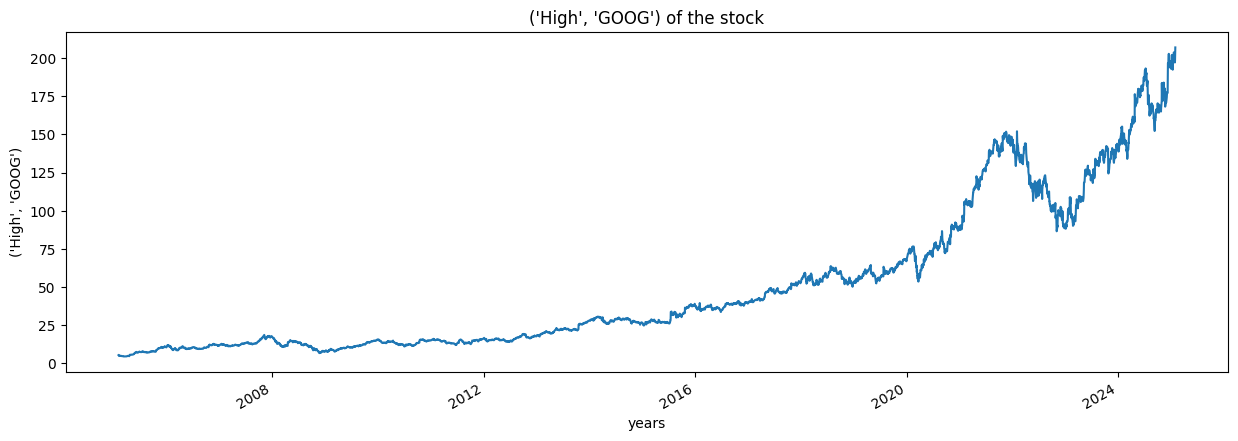

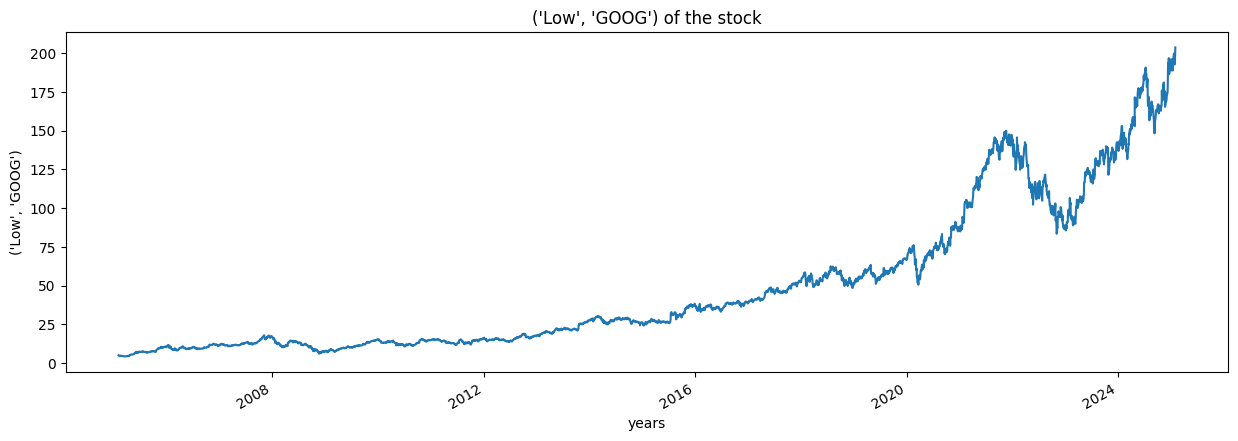

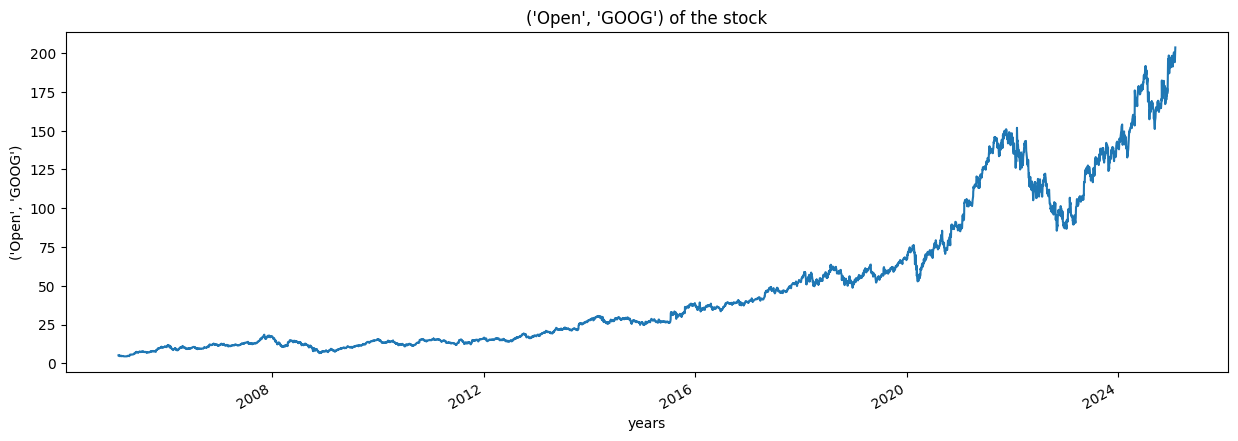

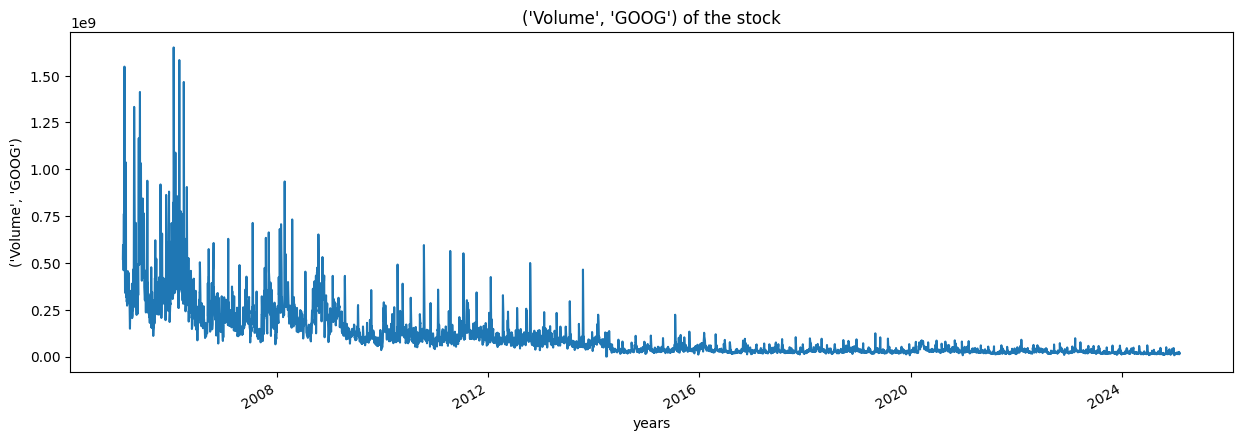

In [15]:
for col in stock_data.columns:
  plot_col((15,5), stock_data[col], col)

In [16]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean()

In [17]:
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2004, 2025):
  print(i, list(stock_data.index.year).count(i))

2004 0
2005 230
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [19]:
stock_data['MA_250_days'] = stock_data['Adj Close'].rolling(250).mean()
stock_data['MA_250_days'][0:250].tail()

,MA_250_days
Date,
2006-01-25,NaN
2006-01-26,NaN
2006-01-27,NaN
2006-01-30,NaN
2006-01-31,7.410969


<Figure size 640x480 with 0 Axes>

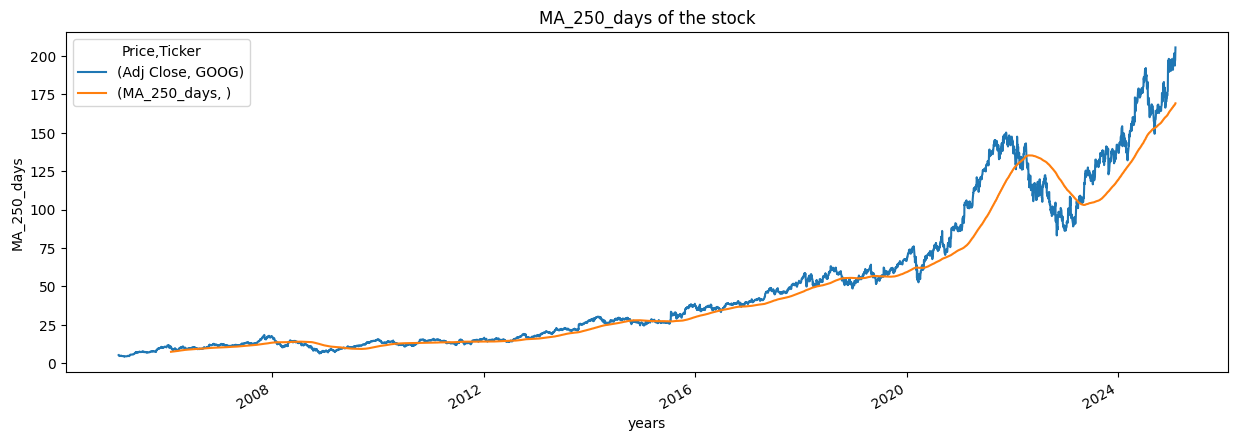

In [20]:
plot_col((15, 5), stock_data[['Adj Close', 'MA_250_days']], 'MA_250_days')

<Figure size 640x480 with 0 Axes>

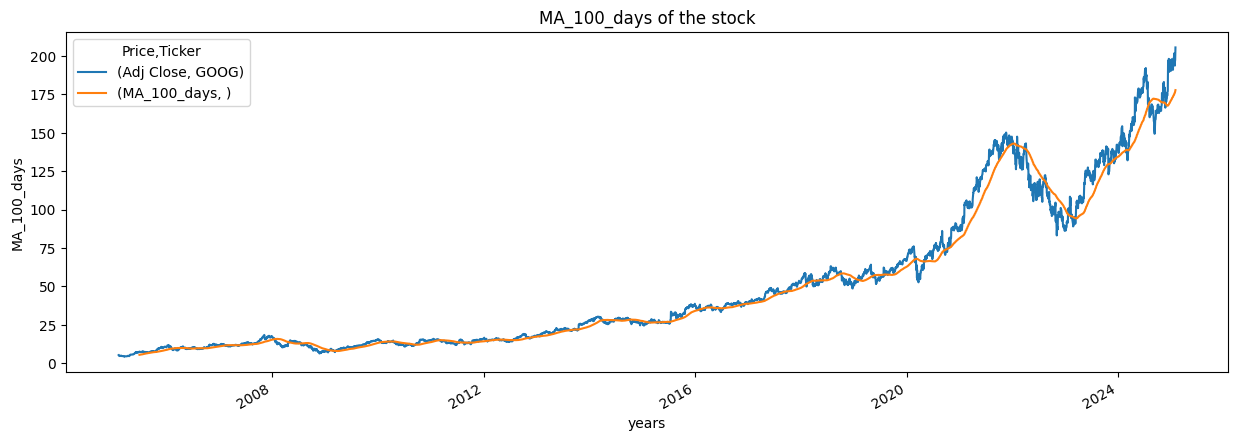

In [21]:
stock_data['MA_100_days'] = stock_data['Adj Close'].rolling(100).mean()
plot_col((15, 5), stock_data[['Adj Close', 'MA_100_days']], 'MA_100_days')

In [22]:
stock_data['percent_change'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close', 'percent_change']].head()

Price,Adj Close,percent_change
Ticker,GOOG,
Date,,
2005-02-03,5.233012,NaN
2005-02-04,5.071699,-0.030826
2005-02-07,4.864969,-0.040762
2005-02-08,4.929743,0.013314
2005-02-09,4.754532,-0.035542


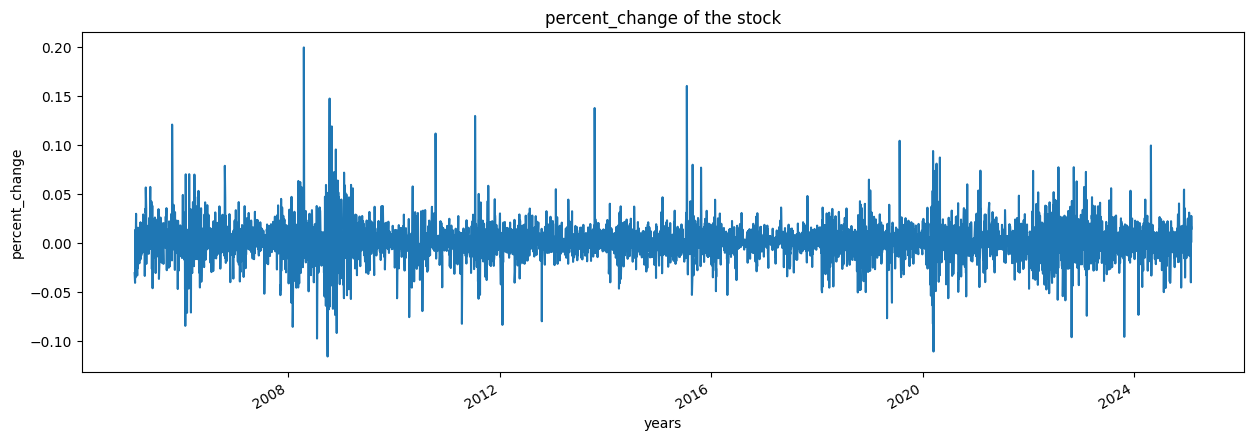

In [23]:
plot_col((15, 5), stock_data['percent_change'], 'percent_change')

In [24]:
adj_close = stock_data[['Adj Close']]

In [25]:
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(adj_close)

In [26]:
scaled_data

array([[0.00442321],
       [0.00362168],
       [0.00259448],
       ...,
       [0.95816292],
       [0.98524276],
       [1.        ]])

In [27]:
X_data = []
y_data = []

In [28]:
for i in range(100, len(scaled_data)):
  X_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

In [29]:
X_data[0], y_data[0]

(array([[4.42320604e-03],
        [3.62167914e-03],
        [2.59448424e-03],
        [2.91633367e-03],
        [2.04574900e-03],
        [1.60182177e-03],
        [1.53029994e-03],
        [2.21961715e-03],
        [2.49583401e-03],
        [2.88796850e-03],
        [2.82508037e-03],
        [2.83124527e-03],
        [2.01985026e-03],
        [2.33799885e-03],
        [1.71403620e-03],
        [1.34163555e-03],
        [1.60305381e-03],
        [1.36506312e-03],
        [1.25654952e-03],
        [1.48220804e-03],
        [1.34533402e-03],
        [1.70416810e-03],
        [1.25901122e-03],
        [7.84261869e-04],
        [6.15324208e-04],
        [3.46504285e-04],
        [0.00000000e+00],
        [4.46388916e-04],
        [7.52179279e-05],
        [5.30238177e-04],
        [6.22721139e-04],
        [7.26308975e-04],
        [4.45156884e-04],
        [4.92012012e-04],
        [5.25307679e-04],
        [7.92893201e-04],
        [5.64765876e-04],
        [6.73279471e-04],
        [6.8

In [30]:
X_data, y_data = np.array(X_data), np.array(y_data)
split = int(len(X_data)*0.7)
X_train = X_data[:split]
y_train = y_data[:split]
X_test = X_data[split:]
y_test = y_data[split:]

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [32]:
# modelling
from keras.models import Sequential
from keras.layers import Dense, InputLayer, LSTM

In [33]:
stock_pred_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
stock_pred_model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
stock_pred_model.fit(X_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - loss: 0.0019
Epoch 2/2
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - loss: 2.8281e-05


In [36]:
stock_pred_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,245 (1.35 MB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,164 (922.52 KB)

In [37]:
predictions = stock_pred_model.predict(X_test)
inv_preds = scalar.inverse_transform(predictions)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


In [38]:
inv_y_test = scalar.inverse_transform(y_test)

In [39]:
rmse = np.sqrt(np.mean(((inv_preds-inv_y_test)**2)))
rmse

8.682257687296243

In [40]:
plot_data = pd.DataFrame({
    'original test data': inv_y_test.reshape(-1),
    'preds': inv_preds.reshape(-1)
    },
    index=stock_data.index[split+100:]
)


In [41]:
plot_data.head()

,original test data,preds
Date,,
2019-03-15,59.010967,56.759495
2019-03-18,59.001003,57.012646
2019-03-19,59.727894,57.252945
2019-03-20,60.979397,57.496704
2019-03-21,61.356541,57.771503


<Figure size 640x480 with 0 Axes>

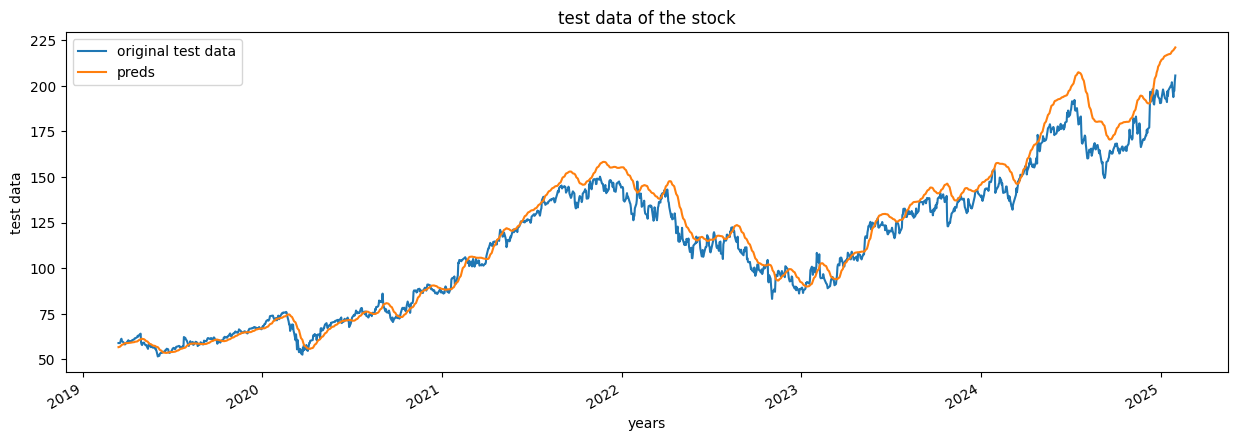

In [42]:
plot_col((15, 5), plot_data, 'test data')

<Figure size 640x480 with 0 Axes>

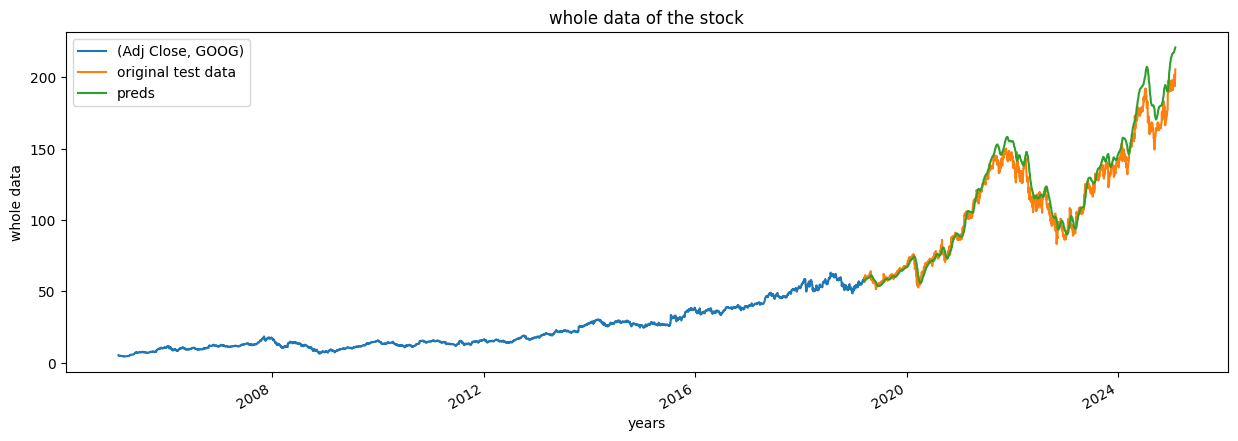

In [43]:
plot_col((15, 5), pd.concat([adj_close[:split+100], plot_data], axis=0), 'whole data')

In [44]:
# prompt: Show the accuracy not the rmse of the model of training and testing data

import yfinance as yf
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, InputLayer, LSTM
from sklearn.metrics import accuracy_score

# !pip install yfinance is already in the provided code



# ... (rest of the provided code)

predictions = stock_pred_model.predict(X_test)
inv_preds = scalar.inverse_transform(predictions)
inv_y_test = scalar.inverse_transform(y_test)

# Convert predictions and actual values to binary classes (e.g., price increase/decrease)
threshold = 0  # Define a threshold for classification
predicted_classes = (inv_preds > threshold).astype(int)
true_classes = (inv_y_test > threshold).astype(int)

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy of the model on test data: {accuracy}")

# ... (rest of the provided code)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Accuracy of the model on test data: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Future Predictions (Next 31 Days):


,Adj Close,Open,High
2025-02-01,221.645798,221.645798,223.862259
2025-02-02,223.031662,223.031662,225.261978
2025-02-03,224.948883,224.948883,227.198364
2025-02-04,227.304626,227.304626,229.577667
2025-02-05,230.025436,230.025436,232.325684
2025-02-06,233.052216,233.052216,235.382736
2025-02-07,236.339050,236.339050,238.702438


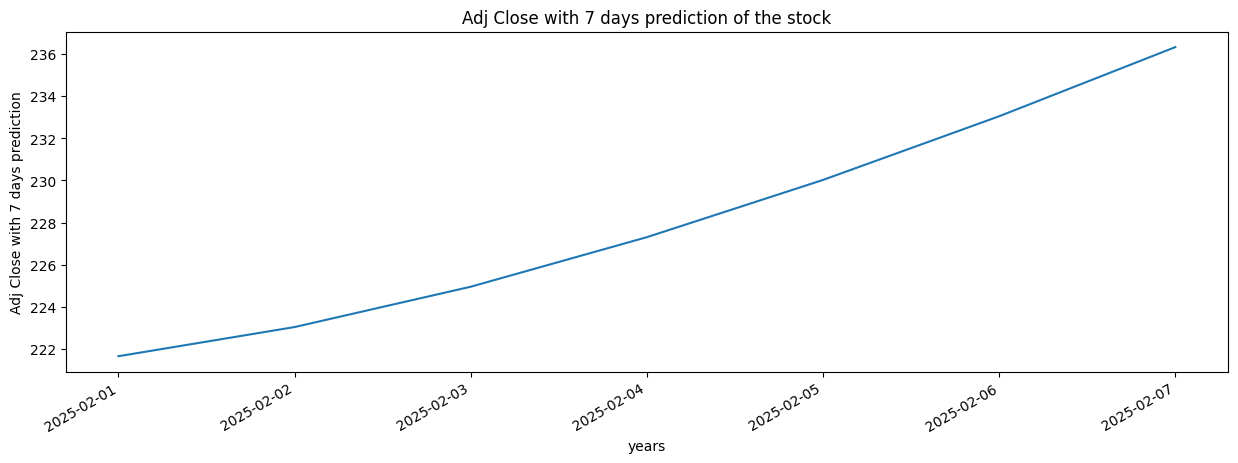

In [51]:
# Prediction for the next 7 days
future_days = 7
last_100_days = scaled_data[-100:]
X_future = []
X_future.append(last_100_days)
X_future = np.array(X_future)

future_predictions = []
current_input = X_future[0].copy()

for i in range(future_days):
  prediction = stock_pred_model.predict(current_input.reshape(1, 100, 1))
  future_predictions.append(prediction[0,0])
  current_input = np.append(current_input[1:], prediction, axis=0)


future_predictions = np.array(future_predictions).reshape(-1,1)
inv_future_preds = scalar.inverse_transform(future_predictions)


# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=future_days)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame({
    'Open': np.nan,  # Placeholder for Open price
    'High': np.nan,  # Placeholder for High price
    'Low': np.nan,  # Placeholder for Low price
    'Close': inv_future_preds.flatten(),
    'Adj Close': inv_future_preds.flatten(),
    'Volume': np.nan  # Placeholder for Volume
}, index=future_dates)


#Combine with original data for plotting
combined_df = pd.concat([stock_data[['Close']],future_df[['Adj Close']]])

#Plot the prediction
plot_col((15, 5), combined_df['Adj Close'], 'Adj Close with 7 days prediction')

# Display the future predictions (Open, High, Close)
print("Future Predictions (Next 31 Days):")
future_df = future_df[['Close']]
future_df = future_df.rename(columns={"Close":"Adj Close"})
future_df['Open'] = future_df['Adj Close']
future_df['High'] = future_df['Adj Close'] * 1.01 #estimated High based on Close
future_df


In [46]:
# Predict on the test set
predictions = stock_pred_model.predict(X_test) # Changed model to stock_pred_model
inv_preds = scalar.inverse_transform(predictions) # Changed scaler to scalar
inv_y_test = scalar.inverse_transform(y_test) # Changed scaler to scalar

# Calculate RMSE
rmse = np.sqrt(np.mean((inv_preds - inv_y_test) ** 2))
print(f'RMSE: {rmse}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
RMSE: 8.682257687296243


In [47]:
from sklearn.metrics import f1_score


# Assuming 'y_test_class' is your binary classification target (0 or 1) for the test set
# and 'predictions_class' is your model's predictions (probabilities or class labels)
# Example:  You might classify as 1 if the predicted price change is positive, 0 otherwise
# Create y_test_class based on price change in y_test
price_change_test = np.diff(inv_y_test.flatten(), prepend=inv_y_test[0][0]) # Calculate price change
y_test_class = (price_change_test > 0).astype(int) # Classify as 1 if price increased, 0 otherwise

predictions_class = (predictions > 0.5).astype(int) # Example: predict 1 if the prediction probability is > 0.5

f1 = f1_score(y_test_class, predictions_class)
print(f"F1 Score: {f1}")

F1 Score: 0.56768038163387


In [48]:
#Precision of the model
from sklearn.metrics import precision_score

# Assuming `y_test_class` are your true labels and `predictions_class` are your predicted labels
# For classification tasks
precision = precision_score(y_test_class, predictions_class, average='binary')  # or 'micro', 'macro', 'weighted'
print("Precision:", precision)

Precision: 0.5522041763341067


In [49]:
from sklearn.metrics import recall_score

# Assuming 'y_test_class' are your true labels and 'predictions_class' are your predicted labels
# For classification tasks
recall = recall_score(y_test_class, predictions_class, average='binary')  # or 'micro', 'macro', 'weighted'
print("Recall:", recall)

Recall: 0.5840490797546012


In [50]:
# Assuming 'y_test_class' is your binary classification target (0 or 1) for the test set
# and 'predictions_class' is your model's predictions (probabilities or class labels)
# Example:  You might classify as 1 if the predicted price change is positive, 0 otherwise
# Create y_test_class based on price change in y_test
price_change_test = np.diff(inv_y_test.flatten(), prepend=inv_y_test[0][0]) # Calculate price change
y_test_class = (price_change_test > 0).astype(int) # Classify as 1 if price increased, 0 otherwise

predictions_class = (predictions > 0.5).astype(int) # Example: predict 1 if the prediction probability is > 0.5

# Calculate Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_class, predictions_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5101351351351351
